### Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009
### Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

#### Predict a company's bankuptcy based on the data
#### Dataset by FEDESORIANO
#### Kaggle Link: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

Project By Xing Ping, Edwin and Krishnadas

## Feature Information
(Y = Output/Target Feature, X = Input Features)

* Y - Bankruptcy indicator: Class label; 1 for presence of bankruptcy, 0 for no bankruptcy.
* X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
* X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
* X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
* X4 - Operating Gross Margin: Gross Profit/Net Sales
* X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
* X6 - Operating Profit Rate: Operating Income/Net Sales
* X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
* X8 - After-tax net Interest Rate: Net Income/Net Sales
* X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
* X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
* X11 - Operating Expense Rate: Operating Expenses/Net Sales
* X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
* X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
* X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
* X15 - Tax rate (A): Effective Tax Rate
* X16 - Net Value Per Share (B): Book Value Per Share(B)
* X17 - Net Value Per Share (A): Book Value Per Share(A)
* X18 - Net Value Per Share (C): Book Value Per Share(C)
* X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
* X20 - Cash Flow Per Share
* X21 - Revenue Per Share (Yuan ¥): Sales Per Share
* X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
* X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
* X24 - Realized Sales Gross Profit Growth Rate
* X25 - Operating Profit Growth Rate: Operating Income Growth
* X26 - After-tax Net Profit Growth Rate: Net Income Growth
* X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
* X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
* X29 - Total Asset Growth Rate: Total Asset Growth
* X30 - Net Value Growth Rate: Total Equity Growth
* X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
* X32 - Cash Reinvestment %: Cash Reinvestment Ratio
* X33 - Current Ratio
* X34 - Quick Ratio: Acid Test
* X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
* X36 - Total debt/Total net worth: Total Liability/Equity Ratio
* X37 - Debt ratio %: Liability/Total Assets
* X38 - Net worth/Assets: Equity/Total Assets
* X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
* X40 - Borrowing dependency: Cost of Interest-bearing Debt
* X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
* X42 - Operating profit/Paid-in capital: Operating Income/Capital
* X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
* X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
* X45 - Total Asset Turnover
* X46 - Accounts Receivable Turnover
* X47 - Average Collection Days: Days Receivable Outstanding
* X48 - Inventory Turnover Rate (times)
* X49 - Fixed Assets Turnover Frequency
* X50 - Net Worth Turnover Rate (times): Equity Turnover
* X51 - Revenue per person: Sales Per Employee
* X52 - Operating profit per person: Operation Income Per Employee
* X53 - Allocation rate per person: Fixed Assets Per Employee
* X54 - Working Capital to Total Assets
* X55 - Quick Assets/Total Assets
* X56 - Current Assets/Total Assets
* X57 - Cash/Total Assets
* X58 - Quick Assets/Current Liability
* X59 - Cash/Current Liability
* X60 - Current Liability to Assets
* X61 - Operating Funds to Liability
* X62 - Inventory/Working Capital
* X63 - Inventory/Current Liability
* X64 - Current Liabilities/Liability
* X65 - Working Capital/Equity
* X66 - Current Liabilities/Equity
* X67 - Long-term Liability to Current Assets
* X68 - Retained Earnings to Total Assets
* X69 - Total income/Total expense
* X70 - Total expense/Assets
* X71 - Current Asset Turnover Rate: Current Assets to Sales
* X72 - Quick Asset Turnover Rate: Quick Assets to Sales
* X73 - Working capitcal Turnover Rate: Working Capital to Sales
* X74 - Cash Turnover Rate: Cash to Sales
* X75 - Cash Flow to Sales
* X76 - Fixed Assets to Assets
* X77 - Current Liability to Liability
* X78 - Current Liability to Equity
* X79 - Equity to Long-term Liability
* X80 - Cash Flow to Total Assets
* X81 - Cash Flow to Liability
* X82 - CFO to Assets
* X83 - Cash Flow to Equity
* X84 - Current Liability to Current Assets
* X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
* X86 - Net Income to Total Assets
* X87 - Total assets to GNP price
* X88 - No-credit Interval
* X89 - Gross Profit to Sales
* X90 - Net Income to Stockholder's Equity
* X91 - Liability to Equity
* X92 - Degree of Financial Leverage (DFL)
* X93 - Interest Coverage Ratio (Interest expense to EBIT)
* X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
* X95 - Equity to Liability

In [2]:
#Import all the relevant/required libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
pd.set_option('display.max_rows',None)

In [2]:
# Read Data
bank_data = pd.read_csv('./Data_source/data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Taking a quick look at our DataFrame above we can see that the first column contains our target variable of bankruptcy. The rest of our data is numerical in nature and contains indicator variables for financial instruments such as the 'Net Income Flag' column, in addition to various financial metrics. Most of these entries have been normalized, or display a percentage, with some non-normalized entries that should be closely looked at for any outliers that may affect predictive modeling.

All features are stored in their respective data type, with 93 columns displaying the float data type, and 3 displaying integer data types. The integer data types are representing indicator variables, such as our target variable bankruptcy, with either the presence of 0 or 1. We have 6819 entries in our dataset overall, or 6861 rows.

In [4]:
#Sanity Check for Null values
bank_data.isnull().any()

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
 Realized Sales Gross Margin                                False
 Operating Profit Rate                                      False
 Pre-tax net Interest Rate                                  False
 After-tax net Interest Rate                                False
 Non-industry income and expenditure/revenue                False
 Continuous interest rate (after tax)                       False
 Operating Expense Rate                                     False
 Research and development expense rate                      False
 Cash flow rate                                             False
 Interest-bearing debt interest rate                        False
 Tax rate 

In [5]:
bank_data["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

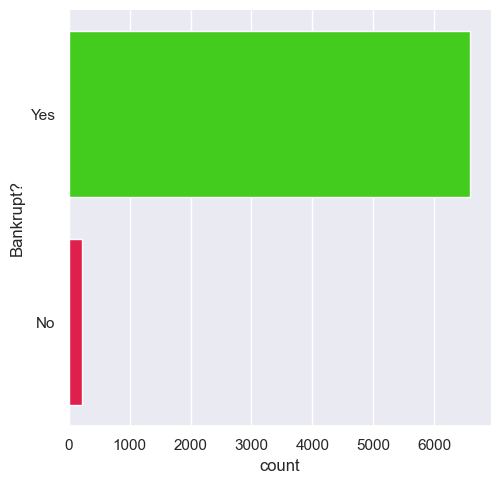

In [6]:
br_check = sb.catplot(y="Bankrupt?", data=bank_data, kind="count", palette= "prism")
br_check.set_yticklabels(labels=['Yes', 'No'])
plt.show()

/var/folders/tz/y92pz2z929b35q7x0ksbdb080000gn/T/ipykernel_17294/692846408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(bank_data[' Gross Profit to Sales'])


<AxesSubplot:xlabel=' Gross Profit to Sales', ylabel='Density'>

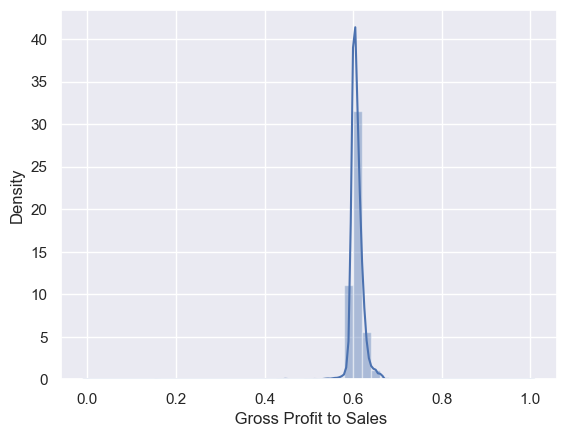

In [9]:
# Generating a distribution plot with seaborn to visualize the distribution of Gross Profit to Sales.
sb.distplot(bank_data[' Gross Profit to Sales'])

We can see that the majority of entries are floating around the 0.6 mark, or 60% gross profit to sales. Gross Profit to Sales ratio understandably may be an important feature for use in the building of our predictive model. Let's examine the distributions of some other features, notably those related to our target variable, by first building a heatmap of all features and selecting those displaying a higher correlation value to our target.

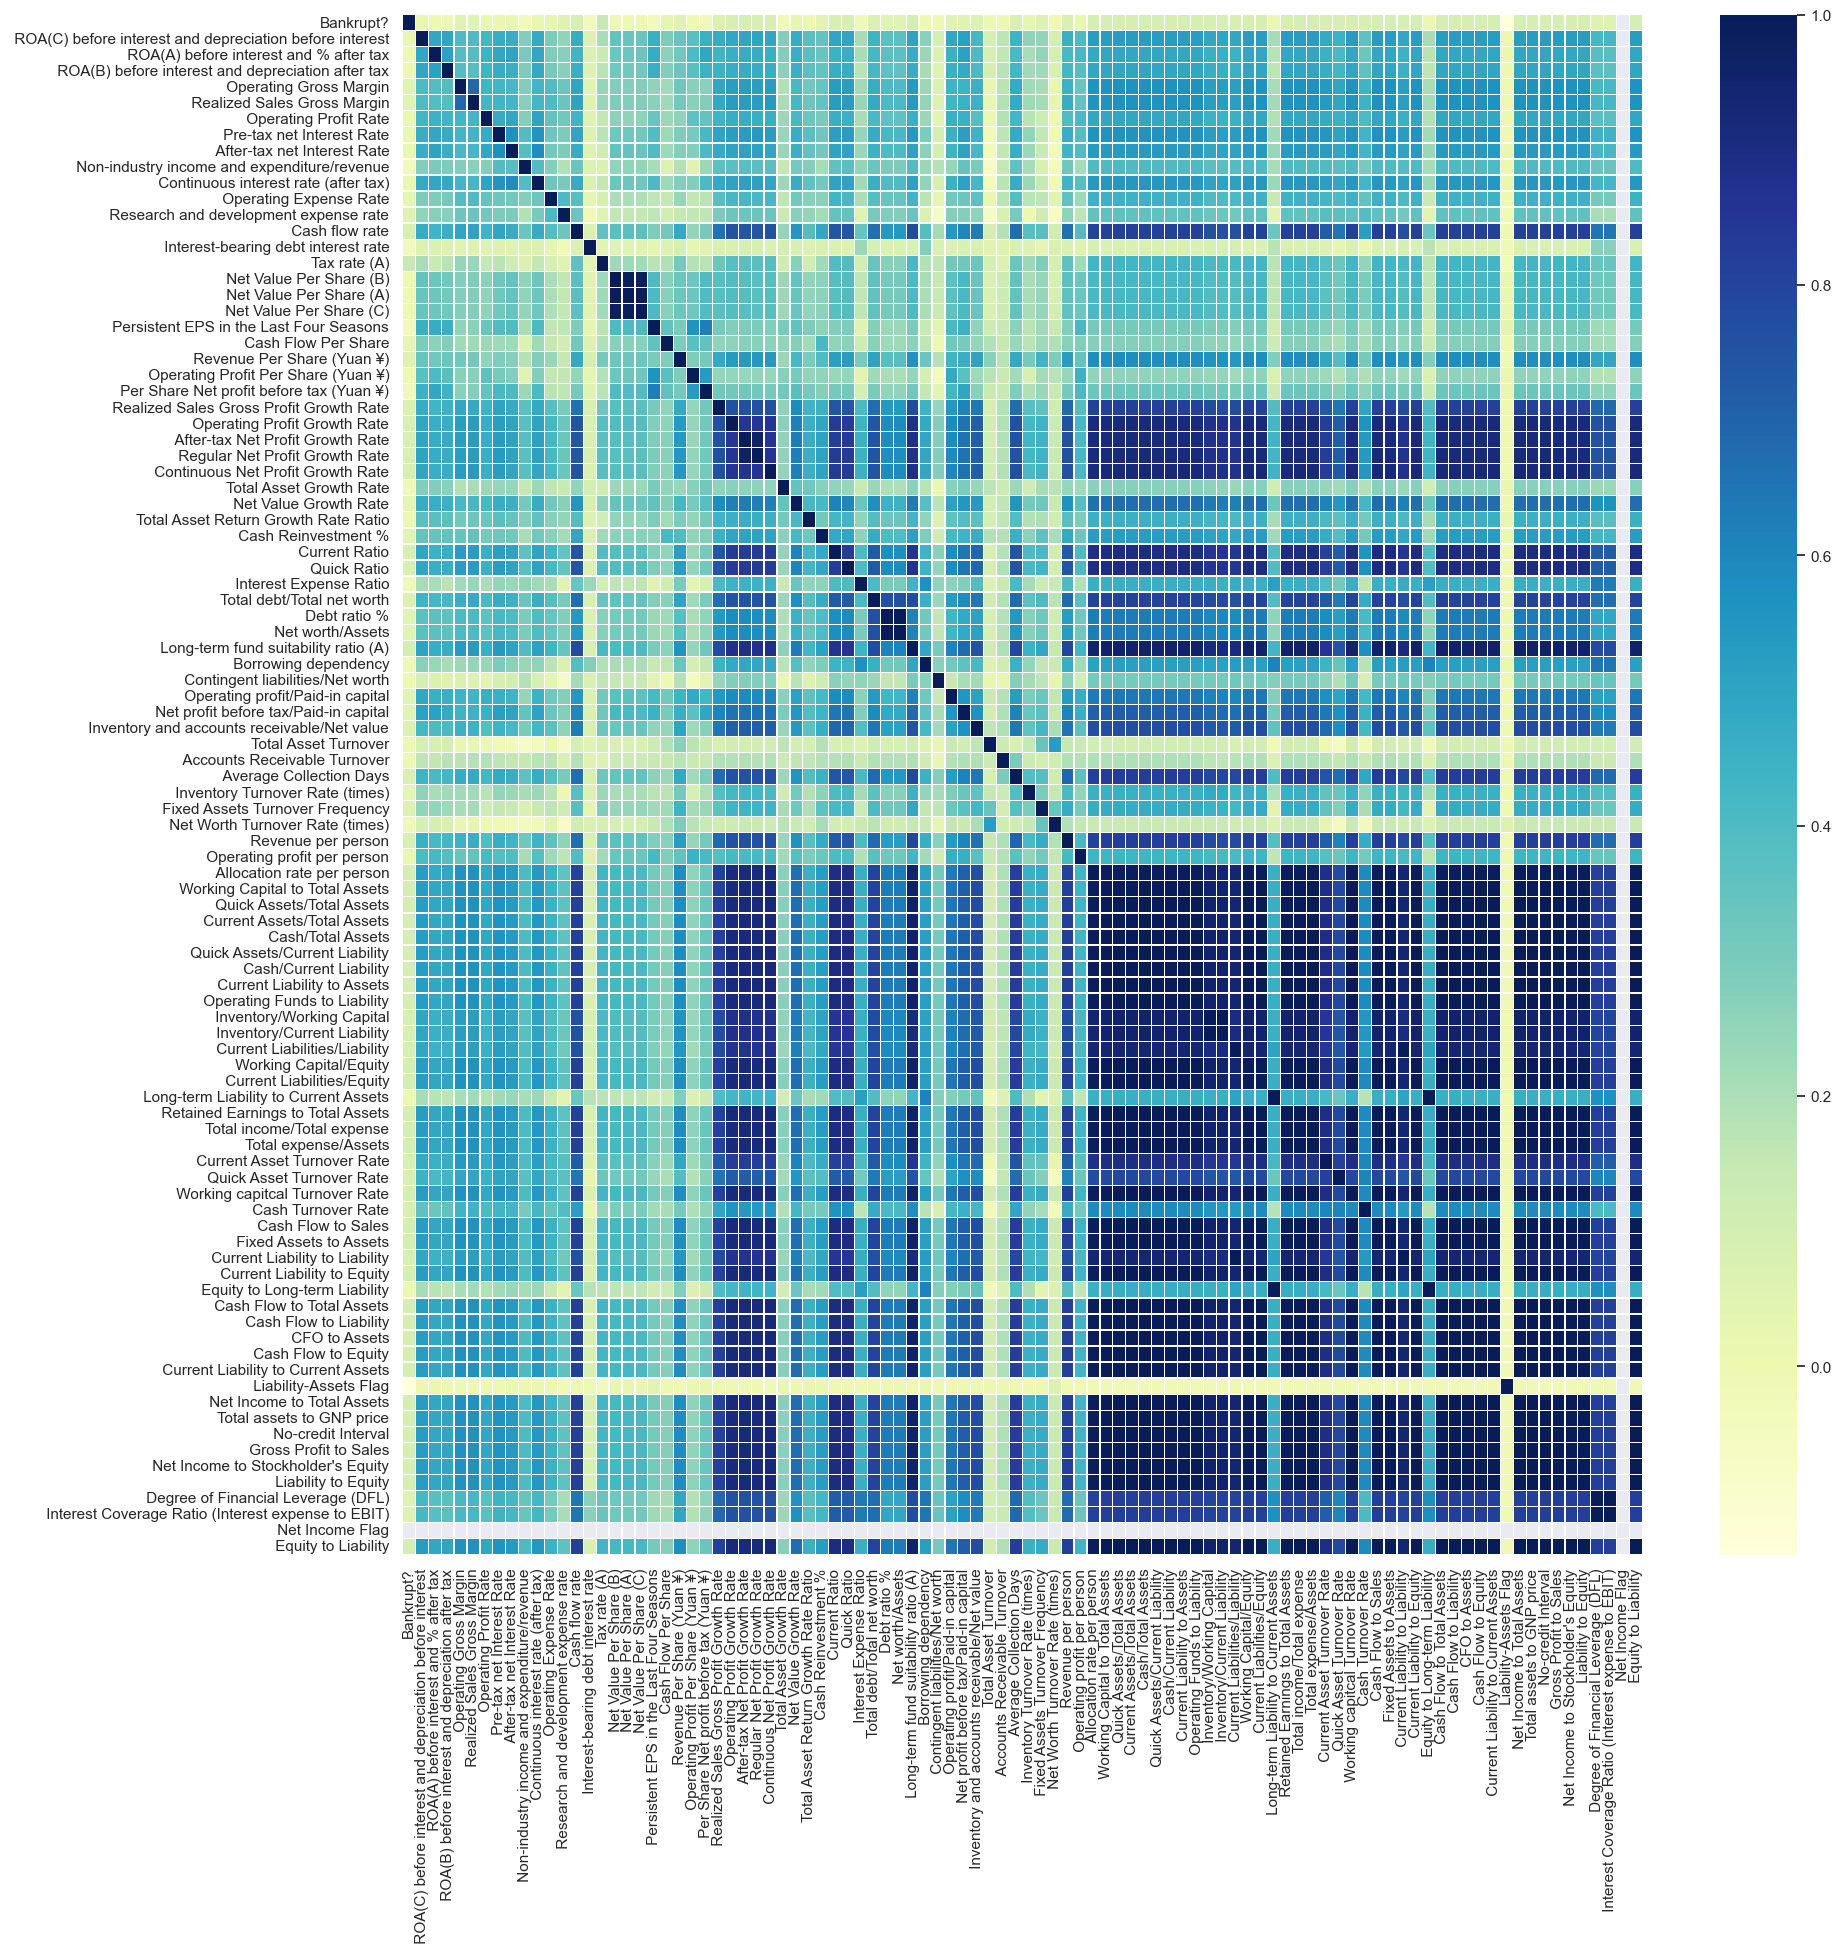

In [11]:
# Plotting a correlation heatmap to give us a visual representation of our correlation matrix. 
plt.figure(figsize=(20, 20))
corr = bank_data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

Looking at the above heatmap we see some input features of interest such as the feature 'Tax Rate (A)' which is displaying a higher correlation value on the correlation matrix than most of the other features with a darker shading. Let's visualize the distribution of this feature next to learn more about it.

<AxesSubplot:xlabel=' Tax rate (A)', ylabel='Count'>

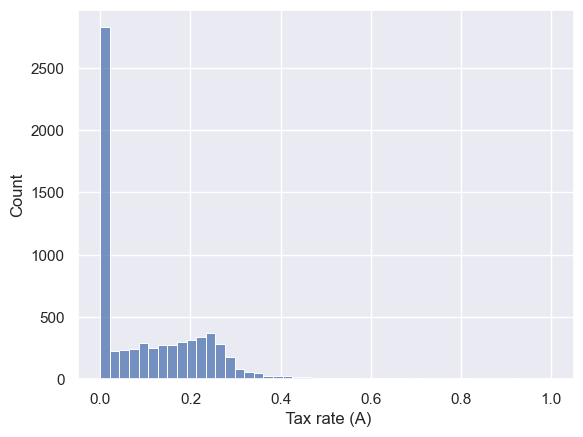

In [13]:
# Generating a histplot with seaborn to visualize the distribution of Tax Rates.
sb.histplot(bank_data[' Tax rate (A)'])

Surprisingly a vast majority of entries displayed a tax rate of 0. This could be due to missing data on a large number of the companies filled as 0, or the companies could have low tax rates due to other economic factors. We can also see some definite outliers in the distribution notably at the upper end with some values displaying 100 percent tax rates. Notably, the distribution is not normal. We will still process the outliers and gain what we can from the data instead of discarding it, through winsorization, during the next data cleaning phase.

<AxesSubplot:xlabel=' Net Income to Total Assets', ylabel='Count'>

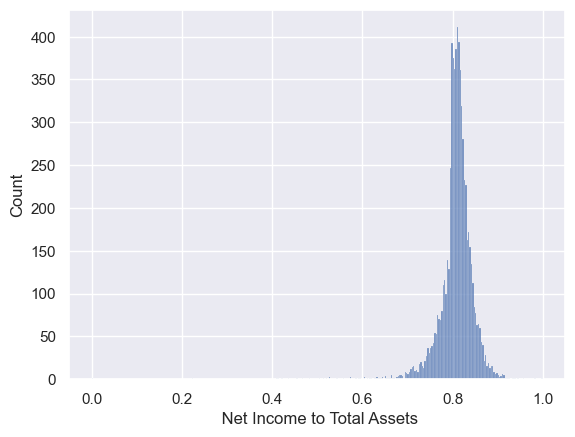

In [15]:
# Generating a histogram with seaborn to visualize the distribution of Net Income to Total Assets.
sb.histplot(bank_data[' Net Income to Total Assets'])

Looking at the heatmaps other features of interest in regards to our target variable of bankruptcy, we can see that the Net Income to Total Assets is showing roughly a normal distribution. This is also known as Return on Assets (ROA) and is a financial ratio that shows the percentage of profit a company earns in relation to its overall resources. Most companies listed have a net income to total asset ratio of 0.8. Notably this financial ratio shows strong correlation to our target variable as one would expect when considering the factors involved in declaring bankruptcy.

In [17]:
# Descriptive statistics for all variables.
bank_data.describe(include= 'all')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Descriptive statistics are useful to get another feel for all features at a glance. We can look at minimum and maximum values for features of interest, as well as the mean and standard deviation. This can give us additional insights into features that might have outliers, such as the operating expense rate where we can see there is a maximum value far greater than the mean and minimum values, which is most certainly an outlier. We will explore outliers and their transformation during model preparation next as outliers can pose a potential problem for our machine learning algorithms, ultimately affecting the performance of our algorithm. These should be processed to gain the most predictive accuracy from our data.



Model Preparation
After Exploratory Data Analysis, the next crucial phase involves model preparation. This involves handling missing data, processing outliers as mentioned previously, class-balancing the target variable, as well as splitting the data into training and testing sets. Adequate model preparation is fundamental to attaining the best results from any predictive machine learning algorithm.

Missing values can cause a wide range of problems when not processed correctly and can prevent necessary code from running altogether. First we need to examine our financial data for any missing values by using Pandas isnull function.

In [19]:
# Creating a DataFrame to show the percentage of missing data from each individual feature.
missing_values = pd.DataFrame(bank_data.isnull().mean() * 100)

In [21]:
# Displaying percentage of all missing values.
missing_values

,0
Bankrupt?,0.0
ROA(C) before interest and depreciation before interest,0.0
ROA(A) before interest and % after tax,0.0
ROA(B) before interest and depreciation after tax,0.0
Operating Gross Margin,0.0
Realized Sales Gross Margin,0.0
Operating Profit Rate,0.0
Pre-tax net Interest Rate,0.0
After-tax net Interest Rate,0.0
Non-industry income and expenditure/revenue,0.0


There are no missing values in this dataset, making it a little easier to work with. As shown above in our exploratory data analysis, we do have features of interest with a large presence of 0s recorded such as 'Tax Rate (A)' meaning these missing values have already been filled with 0 and require no further processing.

OUtlier Detection




An outlier is a data point that lies outside the overall pattern in a distribution. The presence of outliers can severely effect the performance of our machine learning models, so it is best to process them before feeding the data into your algorithm.

We will first examine non-normalized features for outliers by examining them visually with a generated boxplot, and then verifying their presence statistically. Normalized features consist of normalized data, meaning it has been rescaled to a range of 0 and 1. Data normalization is used in machine learning to make model training less sensitive to the scale of features.

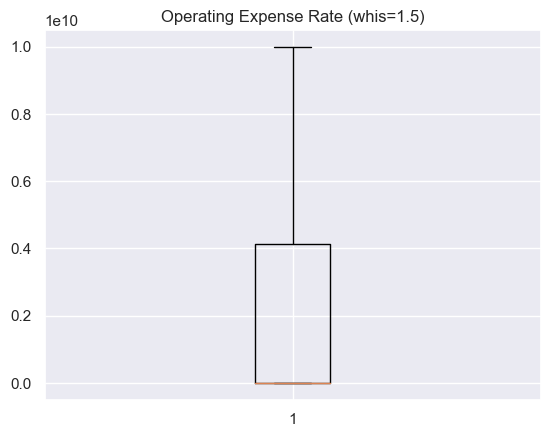

In [23]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features, such as Operating Expense Rate below. 
plt.boxplot(bank_data[" Operating Expense Rate"])
plt.title("Operating Expense Rate (whis=1.5)")
plt.show()

The Operating Expense Rate feature is not showing any outliers outside of the interquartile range displayed on the boxplot. We would see points outside of the whiskers displayed as outliers if that were the case, meaning this feature requires no further processing and does not display any outliers. Let's look at the other variables that are displaying non-normalized data and see if they contain any outliers.

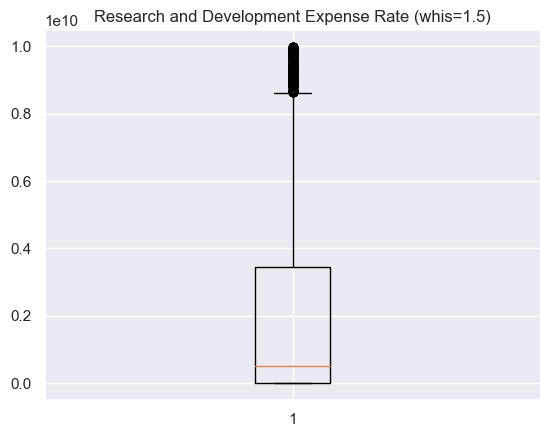

In [24]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(bank_data[" Research and development expense rate"])
plt.title("Research and Development Expense Rate (whis=1.5)")
plt.show()

We can see the presence of some outliers displayed here in the top whisker of the boxplot for the 'research and development expense rate' feature. This indicates that there are values outside of the upper interquartile range. Let's verify this statistically next.

In [26]:
# Calculating the IQR using NumPy's percentile function, which returns the q-th percentile(s) of the array elements.
q75, q25 = np.percentile(bank_data[" Research and development expense rate"], [75 ,25])
iqr = q75 - q25

# Creating a range of threshold values to test using NumPy in intervals of 0.5.
for threshold in np.arange(1,5,0.5):
# Creating minimum outlier threshold value.
    min_val = q25 - (iqr*threshold)
# Creating maximum outlier threshold value.
    max_val = q75 + (iqr*threshold)
# Printing score threshold and resulting number of outliers detected.
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((bank_data[" Research and development expense rate"] > max_val) 
                      | (bank_data[" Research and development expense rate"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 494
The score threshold is: 1.5
Number of outliers is: 182
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


With a score threshold of 1.5 using the standard 1.5x(Interquartile Range) method for identifying outliers, we have 182 data entries that are recorded as outliers. Let's remove these to assist in the performance of our machine learning model by using SciPy's winsorize function. This limits the outliers to a defined threshold instead of completely removing them, allowing for the preservation of some data. This is a much better practice than removing outliers entirely.

Now we use Focus on important columns after cleaning the dataset

In [4]:
cleaned_df = pd.read_csv(r'./Data_Source (cleaned)/data.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Data_Source (cleaned)/data.csv'